In [276]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# pip uninstall plotly
# pip install plotly==2.7.0

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline


# !pip install imblearn

from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn import tree

In [126]:
SEED = 15
np.random.seed(SEED)
df = pd.read_excel("train.xlsx")
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,random
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,114,15.30,82,6.05,5,2.86,SD,415,370-2957,1
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,62,5.70,121,7.22,2,2.67,WV,510,329-7102,2
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,108,12.07,77,8.27,7,3.19,DE,415,346-5053,3
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,96,13.86,151,12.06,3,2.24,UT,415,387-2014,3
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,109,4.50,119,11.07,5,2.94,WA,408,354-9492,4


In [127]:
# Total columns
df_colname = df.columns
df_colname

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Phone', 'random'],
      dtype='object')

In [128]:
# Dropping random and Phone colums
df.drop(['random'], axis=1, inplace = True)
df.drop(['Phone'], axis=1, inplace = True)
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code'],
      dtype='object')

In [129]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,113,36.38,114,15.30,82,6.05,5,2.86,SD,415
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,122,22.59,62,5.70,121,7.22,2,2.67,WV,510
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,80,23.60,108,12.07,77,8.27,7,3.19,DE,415
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,89,34.44,96,13.86,151,12.06,3,2.24,UT,415
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,110,46.63,109,4.50,119,11.07,5,2.94,WA,408


In [130]:
df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,101.134348,8.158261,179.730522,200.464304,201.514870,10.233304,1.570000,0.131739,0.092174,0.276957,100.261304,30.554678,99.964348,17.039691,100.100435,9.068274,4.539565,2.763496,437.561304
std,40.024098,13.794118,53.957228,50.556558,50.623622,2.804560,1.325582,0.338280,0.289334,0.447592,20.253289,9.172699,19.699825,4.297292,19.629139,2.278104,2.510474,0.757203,42.557202
min,1.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,2.030000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,144.475000,165.800000,167.875000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.565000,87.000000,14.090000,87.000000,7.557500,3.000000,2.300000,415.000000
50%,101.000000,0.000000,180.750000,201.250000,202.050000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.730000,100.000000,17.105000,100.000000,9.090000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,215.725000,234.100000,235.625000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.675000,113.000000,19.900000,113.000000,10.602500,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,168.000000,30.910000,175.000000,17.770000,18.000000,5.400000,510.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 20 columns):
Account Length    2300 non-null int64
VMail Message     2300 non-null int64
Day Mins          2300 non-null float64
Eve Mins          2300 non-null float64
Night Mins        2300 non-null float64
Intl Mins         2300 non-null float64
CustServ Calls    2300 non-null int64
Churn             2300 non-null int64
Int'l Plan        2300 non-null int64
VMail Plan        2300 non-null int64
Day Calls         2300 non-null int64
Day Charge        2300 non-null float64
Eve Calls         2300 non-null int64
Eve Charge        2300 non-null float64
Night Calls       2300 non-null int64
Night Charge      2300 non-null float64
Intl Calls        2300 non-null int64
Intl Charge       2300 non-null float64
State             2300 non-null object
Area Code         2300 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 359.5+ KB


In [132]:
df_name = df.columns
df_name

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code'],
      dtype='object')

In [133]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = 2

    trace1 = go.Histogram(
        x=data_array,
        histnorm='count',
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [134]:
plotHist(df,df_name[0])

In [135]:
plotHist(df,df_name[1])

In [136]:
plotHist(df,df_name[2])

In [13]:
plotHist(df,df_name[3])

In [14]:
plotHist(df,df_name[4])

In [15]:
plotHist(df,df_name[5])

In [16]:
plotHist(df,df_name[6])

In [17]:
plotHist(df,df_name[8])

In [18]:
plotHist(df,df_name[9])

In [19]:
plotHist(df,df_name[10])

In [20]:
plotHist(df,df_name[11])

In [21]:
plotHist(df,df_name[12])

In [22]:
plotHist(df,df_name[13])

In [23]:
plotHist(df,df_name[14])

In [24]:
plotHist(df,df_name[15])

In [25]:
plotHist(df,df_name[16])

In [26]:
plotHist(df,df_name[17])

In [27]:
plotHist(df,df_name[19])

In [137]:
# Outliers
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    Not_churn = go.Histogram(
        x=x0,
        opacity=0.75
    )
    Churn = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [Not_churn, Churn]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [138]:
plotBarCat(df,df_name[0],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [30]:
plotBarCat(df,df_name[0],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [31]:
plotBarCat(df,df_name[1],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [32]:
plotBarCat(df,df_name[2],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [33]:
plotBarCat(df,df_name[3],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [34]:
plotBarCat(df,df_name[4],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [35]:
plotBarCat(df,df_name[5],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [36]:
plotBarCat(df,df_name[6],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [37]:
plotBarCat(df,df_name[7],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [38]:
plotBarCat(df,df_name[8],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [39]:
plotBarCat(df,df_name[9],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [40]:
plotBarCat(df,df_name[10],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [41]:
plotBarCat(df,df_name[11],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [42]:
plotBarCat(df,df_name[12],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [43]:
plotBarCat(df,df_name[13],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [44]:
plotBarCat(df,df_name[14],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [45]:
plotBarCat(df,df_name[15],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [46]:
plotBarCat(df,df_name[16],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [47]:
plotBarCat(df,df_name[17],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [48]:
plotBarCat(df,df_name[18],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [49]:
plotBarCat(df,df_name[19],'Churn')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Churn mean :  0.1317391304347826
Churn var  :  0.11438393194706639
Churn skew :  2.1777251128860757
Churn kurt :  2.7424866672946706
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [50]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [51]:
PlotPie(df, 'Churn')

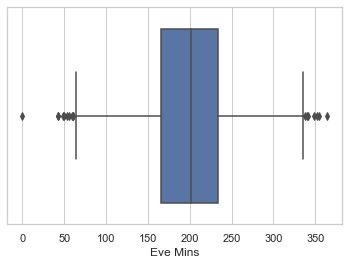

In [52]:
sns.set(style = "whitegrid")
sns.boxplot(x = df["Eve Mins"])
plt.show()

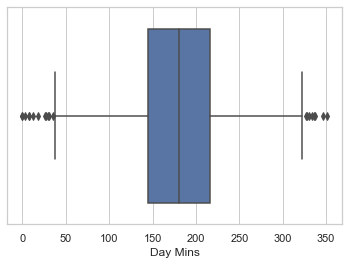

In [53]:
sns.set(style = "whitegrid")
sns.boxplot(x = df["Day Mins"])
plt.show()

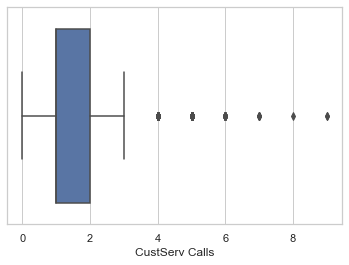

In [54]:
sns.set(style = "whitegrid")
sns.boxplot(x = df["CustServ Calls"])
plt.show()

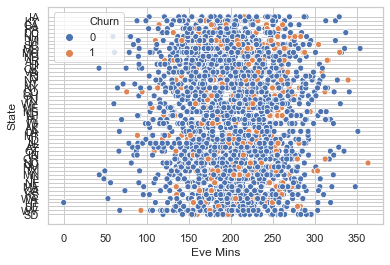

In [55]:
sns.scatterplot( x = "Eve Mins", y ="State", data = df, hue = "Churn" )
plt.show()

IN    53
MI    50
TX    48
RI    48
MD    51
AL    55
WI    56
SD    44
NE    39
NJ    48
DE    37
MO    48
MS    42
TN    43
FL    41
CT    46
GA    40
VA    55
ME    45
ND    43
IA    28
WY    47
VT    50
WA    43
NH    43
WV    69
MA    49
PA    33
NC    51
NM    48
MT    51
IL    40
OH    44
OK    36
LA    34
CO    48
DC    39
CA    22
AR    42
MN    49
NY    59
OR    50
AK    34
SC    43
KY    43
NV    45
KS    45
AZ    45
ID    52
HI    39
UT    47
dtype: int64

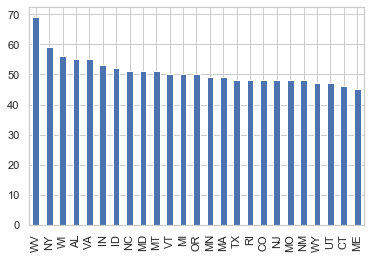

In [56]:
# Value count for State columns
df["State"].value_counts().head(25).plot.bar()
pd.value_counts(df["State"].values, sort=False)

## Modeling for Unbalanced data

In [139]:
# Label Encoder for State column
le = LabelEncoder()
le.fit(df['State'])
df['State'] = le.transform(df['State'])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 20 columns):
Account Length    2300 non-null int64
VMail Message     2300 non-null int64
Day Mins          2300 non-null float64
Eve Mins          2300 non-null float64
Night Mins        2300 non-null float64
Intl Mins         2300 non-null float64
CustServ Calls    2300 non-null int64
Churn             2300 non-null int64
Int'l Plan        2300 non-null int64
VMail Plan        2300 non-null int64
Day Calls         2300 non-null int64
Day Charge        2300 non-null float64
Eve Calls         2300 non-null int64
Eve Charge        2300 non-null float64
Night Calls       2300 non-null int64
Night Charge      2300 non-null float64
Intl Calls        2300 non-null int64
Intl Charge       2300 non-null float64
State             2300 non-null int32
Area Code         2300 non-null int64
dtypes: float64(8), int32(1), int64(11)
memory usage: 350.5 KB


In [141]:
# Target variable
Y = df["Churn"]

In [142]:
df.drop(['Churn'], axis=1, inplace = True)

In [143]:
X = df
X.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
0,87,21,214.0,180.0,134.5,10.6,0,0,1,113,36.38,114,15.30,82,6.05,5,2.86,41,415
1,63,0,132.9,67.0,160.4,9.9,3,0,0,122,22.59,62,5.70,121,7.22,2,2.67,49,510
2,103,34,138.8,142.0,183.8,11.8,1,0,1,80,23.60,108,12.07,77,8.27,7,3.19,8,415
3,44,0,202.6,163.0,268.1,8.3,0,0,0,89,34.44,96,13.86,151,12.06,3,2.24,44,415
4,166,0,274.3,52.9,246.1,10.9,0,0,0,110,46.63,109,4.50,119,11.07,5,2.94,47,408


In [144]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [145]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 0, stratify = Y)

In [146]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(X_test.shape)

(1380, 19)
(920, 19)
(1380,)
(920, 19)


In [176]:
## Test data - Validation

df_test = pd.read_excel("test.xlsx")

df_test.drop(['Phone'], axis=1, inplace = True)

df_test.columns

df_y_test = df_test["Churn"]

df_test.drop(["Churn"], axis=1, inplace= True)

df_x_test = df_test

le = LabelEncoder()
le.fit(df_x_test['State'])
df_x_test['State'] = le.transform(df_x_test['State'])

In [179]:
df_x_edited_test = df_x_test[['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',
       'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Eve Calls','Night Calls', 'Intl Calls', 'State']]
df_y_edited_test = df_y_test

In [180]:
df_x_edited_test.head()

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Eve Calls,Night Calls,Intl Calls,State
0,35,181.1,215.9,216.3,16.9,0,1,1,59,116,106,4,8
1,22,306.2,189.7,240.3,11.7,0,0,1,123,83,107,2,7
2,23,160.3,202.4,191.1,7.4,0,0,1,87,101,122,3,35
3,0,277.9,155.8,256.9,9.2,0,1,0,123,112,71,10,25
4,32,183.4,269.1,203.5,6.7,5,0,1,94,120,38,4,8


In [174]:
# Models
def GetBasedModel():
    basedModels = []
    basedModels.append(('Logistic Regression'   , LogisticRegression()))
    basedModels.append(('Linear Discriminant Analysis'  , LinearDiscriminantAnalysis()))
    basedModels.append(('K Nearest Neighbours'  , KNeighborsClassifier()))
    basedModels.append(('Decision Tree' , DecisionTreeClassifier()))
    basedModels.append(('Gaussian NB'   , GaussianNB()))
    basedModels.append(('Support Vector Machine'  , SVC(probability=True)))
    basedModels.append(('AdaBoost Classifier'   , AdaBoostClassifier()))
    basedModels.append(('Gradient Boosting Classifier'  , GradientBoostingClassifier()))
    basedModels.append(('Random Forest Classifier'   , RandomForestClassifier()))
    basedModels.append(('Extra Tree Classifier'   , ExtraTreesClassifier()))

    
    return basedModels

In [175]:
def BasedLine2(X_train, Y_train,models):
    # Test options and evaluation metric
    num_folds = 15
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [176]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [177]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)

Logistic Regression: 0.871010 (0.020998)
Linear Discriminant Analysis: 0.862306 (0.020224)
K Nearest Neighbours: 0.884031 (0.025103)
Decision Tree: 0.928259 (0.022748)
Gaussian NB: 0.873846 (0.026946)
Support Vector Machine: 0.868127 (0.003141)
AdaBoost Classifier: 0.873878 (0.024292)
Gradient Boosting Classifier: 0.954331 (0.015506)
Random Forest Classifier: 0.931851 (0.023010)
Extra Tree Classifier: 0.909418 (0.015228)


In [68]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [69]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,Score
0,Logistic Regression,0.8732
1,Linear Discriminant Analysis,0.8630
2,K Nearest Neighbours,0.8840
3,Decision Tree,0.9275
4,Gaussian NB,0.8753
5,Support Vector Machine,0.8681
6,AdaBoost Classifier,0.8739
7,Gradient Boosting Classifier,0.9507
8,Random Forest Classifier,0.9326
9,Extra Tree Classifier,0.9058


## Scaling the data

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [71]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.868811 (0.016589)
standardLDA: 0.863019 (0.013410)
standardKNN: 0.888398 (0.012663)
standardCART: 0.931132 (0.024994)
standardNB: 0.875302 (0.020292)
standardSVM: 0.910138 (0.015633)
standardAB: 0.873884 (0.015792)
standardGBM: 0.951443 (0.020215)
standardRF: 0.930434 (0.024482)
standardET: 0.907276 (0.021828)


,Model,Score,Model,Score
0,Logistic Regression,0.8732,standardLR,0.8688
1,Linear Discriminant Analysis,0.8630,standardLDA,0.8630
2,K Nearest Neighbours,0.8840,standardKNN,0.8884
3,Decision Tree,0.9275,standardCART,0.9311
4,Gaussian NB,0.8753,standardNB,0.8753
5,Support Vector Machine,0.8681,standardSVM,0.9101
6,AdaBoost Classifier,0.8739,standardAB,0.8739
7,Gradient Boosting Classifier,0.9507,standardGBM,0.9514
8,Random Forest Classifier,0.9326,standardRF,0.9304
9,Extra Tree Classifier,0.9058,standardET,0.9073


In [72]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, Y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.871001 (0.008681)
minmaxLDA: 0.863019 (0.013410)
minmaxKNN: 0.885505 (0.017955)
minmaxCART: 0.924641 (0.021778)
minmaxNB: 0.875302 (0.020292)
minmaxSVM: 0.868124 (0.002435)
minmaxAB: 0.873884 (0.015792)
minmaxGBM: 0.950713 (0.020162)
minmaxRF: 0.931857 (0.020599)
minmaxET: 0.926054 (0.017766)


,Model,Score,Model,Score,Model,Score
0,Logistic Regression,0.8732,standardLR,0.8688,minmaxLR,0.8710
1,Linear Discriminant Analysis,0.8630,standardLDA,0.8630,minmaxLDA,0.8630
2,K Nearest Neighbours,0.8840,standardKNN,0.8884,minmaxKNN,0.8855
3,Decision Tree,0.9275,standardCART,0.9311,minmaxCART,0.9246
4,Gaussian NB,0.8753,standardNB,0.8753,minmaxNB,0.8753
5,Support Vector Machine,0.8681,standardSVM,0.9101,minmaxSVM,0.8681
6,AdaBoost Classifier,0.8739,standardAB,0.8739,minmaxAB,0.8739
7,Gradient Boosting Classifier,0.9507,standardGBM,0.9514,minmaxGBM,0.9507
8,Random Forest Classifier,0.9326,standardRF,0.9304,minmaxRF,0.9319
9,Extra Tree Classifier,0.9058,standardET,0.9073,minmaxET,0.9261


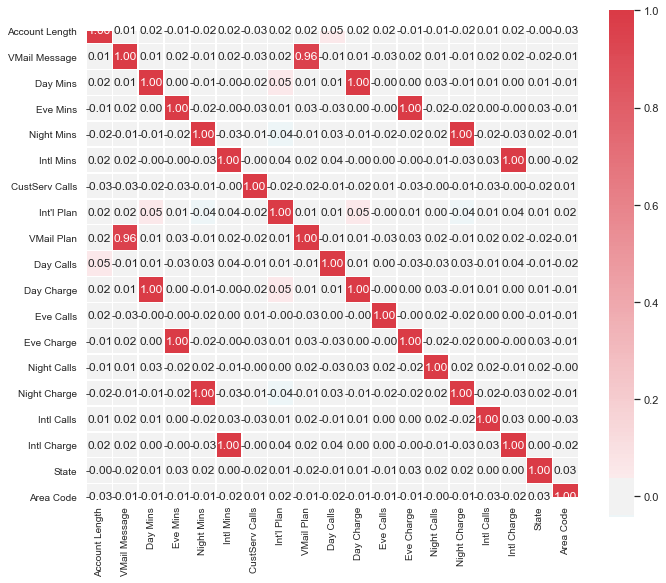

In [73]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

## Analysis of co relation

1. so many dependent features are availabke in data set . we need to drop the dependent columns 

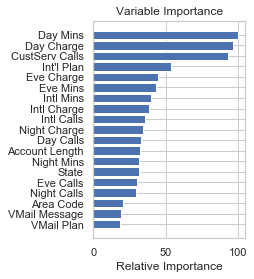

In [74]:
clf = ExtraTreesClassifier(n_estimators=150,
                              random_state=SEED)

clf.fit(X_train, Y_train)


# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [258]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [259]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [281]:


class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPredict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [260]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [78]:
# ada boost

learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)



In [79]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train,Y_train,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((Y_test == Prediction_Ad).mean(),7))

Best: 0.883333 using {'learning_rate': 0.5, 'n_estimators': 200}
prediction on test set is: 0.873913


In [80]:
from sklearn.metrics import f1_score, confusion_matrix

In [81]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300,400,500,1000]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [82]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train,Y_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)
print('prediction on test set is:' ,floatingDecimals((Y_test == Prediction_GB).mean(),7))

Best: 0.952899 using {'learning_rate': 0.05, 'n_estimators': 300}
prediction on test set is: 0.9445652


#### Best model hyper parameters for GB 

learning_rate = 0.05, no of trees = 300

In [83]:
learning_rate_value = 0.05
n_estimators_value = 300
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(X_train, Y_train)
y_pred = model_GB.predict(X_test)
accscore = accuracy_score(Y_test, y_pred)
current_f1_score = f1_score(y_pred, Y_test)
conf_mat = confusion_matrix(Y_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.762791
Accuracy - Score  :0.944565
[[787  12]
 [ 39  82]]


### Balancing the data using SMOTE

In [210]:
from sklearn.model_selection import train_test_split
X_smt_train,X_smt_test,Y_smt_train,Y_smt_test = train_test_split(X,Y,test_size = 0.3,random_state = 0, stratify = Y)

In [212]:
smt = SMOTE()
X_smt_train, Y_smt_train = smt.fit_sample(X_smt_train,Y_smt_train)

In [213]:
print(X_smt_train.shape)
print(X_smt_test.shape)
print(Y_smt_train.shape)
print(X_smt_test.shape)

(2796, 19)
(690, 19)
(2796,)
(690, 19)


### Modeling for Balanced data

In [271]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [272]:
def BasedLine3(X_train, Y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'f1'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_smt_train, Y_smt_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

#### F1 Score of all the models for training data

In [216]:
# F1 score
models = GetBasedModel()
names,results = BasedLine3(X_smt_train, Y_smt_train,models)

Logistic Regression: 0.787754 (0.021776)
Linear Discriminant Analysis: 0.779791 (0.026905)
K Nearest Neighbours: 0.859762 (0.013958)
Decision Tree: 0.935905 (0.021322)
Gaussian NB: 0.803608 (0.010537)
Support Vector Machine: 0.581003 (0.093881)
AdaBoost Classifier: 0.889127 (0.101740)
Gradient Boosting Classifier: 0.950927 (0.047094)
Random Forest Classifier: 0.953034 (0.019158)
Extra Tree Classifier: 0.963552 (0.019911)


#### Accuracy of all the models for training data

In [217]:
# Accuracy
models = GetBasedModel()
names,results = BasedLine2(X_smt_train, Y_smt_train,models)

Logistic Regression: 0.781822 (0.022731)
Linear Discriminant Analysis: 0.776102 (0.027028)
K Nearest Neighbours: 0.838682 (0.017691)
Decision Tree: 0.934900 (0.025116)
Gaussian NB: 0.796498 (0.013065)
Support Vector Machine: 0.708124 (0.051602)
AdaBoost Classifier: 0.899170 (0.072844)
Gradient Boosting Classifier: 0.953867 (0.039876)
Random Forest Classifier: 0.952423 (0.020167)
Extra Tree Classifier: 0.971737 (0.008249)


#### Gradient Boosting for Balanced data (Using Hyper parameters)

In [218]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300,400,500,1000]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [219]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_smt_train,Y_smt_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_smt_test)
print('prediction on test set is:' ,floatingDecimals((Y_smt_test == Prediction_GB).mean(),7))

Best: 0.968884 using {'learning_rate': 0.1, 'n_estimators': 300}
prediction on test set is: 0.9507246


In [220]:
# Best Model
learning_rate_value = 0.1
n_estimators_value = 300
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(X_smt_train, Y_smt_train)
y_pred = model_GB.predict(X_smt_test)
accscore = accuracy_score(Y_smt_test, y_pred)
current_f1_score = f1_score(y_pred, Y_smt_test)
conf_mat = confusion_matrix(Y_smt_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.822857
Accuracy - Score  :0.955072
[[587  12]
 [ 19  72]]


In [231]:
# Validation data - Xg Boost
learning_rate_value = 0.1
n_estimators_value = 300
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(X_smt_train, Y_smt_train)
y_pred = model_GB.predict(df_x_test)
accscore = accuracy_score(df_y_test, y_pred)
current_f1_score = f1_score(y_pred, df_y_test)
conf_mat = confusion_matrix(df_y_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.781250
Accuracy - Score  :0.932236
[[838  15]
 [ 55 125]]


#### AdaBoost (Using Hyper Parameters)

In [232]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [233]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_smt_train,Y_smt_train,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_smt_test)
print('prediction on test set is:' ,floatingDecimals((Y_smt_test == Prediction_Ad).mean(),7))

Best: 0.914878 using {'learning_rate': 1, 'n_estimators': 250}
prediction on test set is: 0.8753623


In [236]:
##Best Model- adaboost
learning_rate_value = 1
n_estimators_value = 250
model_Ad = AdaBoostClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_Ad.fit(X_smt_train, Y_smt_train)
y_pred = model_Ad.predict(X_smt_test)
accscore = accuracy_score(Y_smt_test, y_pred)
current_f1_score = f1_score(y_pred, Y_smt_test)
conf_mat = confusion_matrix(Y_smt_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (accscore))
print(conf_mat)


F1-Score :0.522222
Accuracy :0.875362
[[557  42]
 [ 44  47]]


In [237]:
 #Best Model - Validation model - adaboost
learning_rate_value = 1
n_estimators_value = 250
model_Ad = AdaBoostClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_Ad.fit(X_smt_train, Y_smt_train)
y_pred = model_Ad.predict(df_x_test)
accscore = accuracy_score(df_y_test, y_pred)
current_f1_score = f1_score(y_pred, df_y_test)
conf_mat = confusion_matrix(df_y_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (accscore))
print(conf_mat)

F1-Score :0.530351
Accuracy :0.857696
[[803  50]
 [ 97  83]]


#### Radom Forest (Using Hyper Parameters)

In [238]:
from sklearn.model_selection import GridSearchCV
# model_RF = RandomForestClassifier(random_state=42)
model_RF = RandomForestClassifier()
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_model_RF = GridSearchCV(estimator = model_RF , param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)
CV_model_RF.fit(X_smt_train,Y_smt_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min


In [ ]:
CV_model_RF.best_params_

In [ ]:
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=80, 
                             criterion='entropy', min_samples_leaf = 3, min_samples_split = 8)
rfc.fit(X_smt_train,Y_smt_train)
y_pred = rfc.predict(X_smt_test)
acc_score = accuracy_score(Y_smt_test, y_pred)
current_f1_score = f1_score(y_pred, Y_smt_test)
conf_mat = confusion_matrix(Y_smt_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

In [ ]:
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=80, 
                             criterion='entropy', min_samples_leaf = 3, min_samples_split = 8)
rfc.fit(X_smt_train,Y_smt_train)
y_pred = rfc.predict(df_x_test)
acc_score = accuracy_score(df_y_test, y_pred)
current_f1_score = f1_score(y_pred, df_y_test)
conf_mat = confusion_matrix(df_y_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

#### Logistic Regression (Using Hyper Parameters)¶

In [ ]:
# Create logistic regression
# from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic = linear_model.LogisticRegression()

In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fit grid search
best_model = clf.fit(X_smt_train, Y_smt_train)

In [ ]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
# Predict target vector
y_pred = best_model.predict(X_smt_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_smt_test, y_pred)

In [ ]:
# validation Model - Logistic regression
y_pred = best_model.predict(df_x_test)
roc_auc_score(df_y_test, y_pred)

#### Decision Tree for Balanced data (Using Hyper Parameters)

In [ ]:
from sklearn import tree, model_selection
classifier = tree.DecisionTreeClassifier()
# max_depth = np.arange(1, 21)
# min_samples_leaf = [1, 2, 3, 4, 5, 10, 20, 50]

# Create hyperparameter options
dt_grid = {'max_depth': [1,3,4,5,6,7,9,10,11,14,15,17,19,20], "min_samples_leaf":[1, 2, 3, 4, 5, 10, 20, 50]}

grid_classifier = model_selection.GridSearchCV(classifier, dt_grid, cv=5, refit=True)

In [ ]:
gs = grid_classifier.fit(X_smt_train,Y_smt_train)

In [ ]:
results = grid_classifier.cv_results_

In [ ]:
print(gs.best_params_)

In [ ]:
print(grid_classifier.best_params_)

In [ ]:

# DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)

In [ ]:
from sklearn import tree, model_selection
classf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                     max_depth=9, min_samples_split=5)
classf.fit(X_smt_train,Y_smt_train)
y_pred = classf.predict(X_smt_test)
acc_score = accuracy_score(y_pred, Y_smt_test)
current_f1_score = f1_score(y_pred, Y_smt_test)
# f1_score(y_true, y_pred, average='weighted') 
conf_mat = confusion_matrix(Y_smt_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

In [ ]:
classf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                     max_depth=9, min_samples_split=5)
classf.fit(X_smt_train,Y_smt_train)
y_pred = classf.predict(df_x_test)
acc_score = accuracy_score(y_pred, df_y_test)
current_f1_score = f1_score(y_pred, df_y_test)
# f1_score(y_true, y_pred, average='weighted') 
conf_mat = confusion_matrix(df_y_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

### Removing Multicollinear variables

- total_night_minutes and total_night_charge
- total_eve_minutes and total_eve_charge
- total_intl_minutes and total_intl_charge
- total_day_minutes and total_day_charge

In [ ]:
df_1 = pd.read_excel("train.xlsx")
df_1.columns

In [ ]:
data = df_1
data.columns

In [ ]:
y_edited = data["Churn"]

In [ ]:
data.drop(['Churn', 'Account Length', 'Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge',
          'Area Code', 'Phone', 'random'], axis=1, inplace = True)

In [ ]:
x_edited = data
x_edited.columns

In [ ]:
x_edited.shape

In [ ]:
x_edited.head()

In [ ]:
y_edited.shape

In [ ]:
y_edited.head()

In [ ]:
#Label Encoder for State column
le = LabelEncoder()
le.fit(x_edited['State'])
x_edited['State'] = le.transform(x_edited['State'])

In [ ]:
x_edited_train, x_edited_test, y_edited_train, y_edited_test = train_test_split(x_edited, y_edited, test_size = 0.3, random_state = 0, 
                                                                                stratify = Y)

In [ ]:
smt = SMOTE()
x_edited_train, y_edited_train= smt.fit_sample(x_edited_train, y_edited_train)

#### Xgboost with fewer variables using Hyper parameters

In [134]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300,400,500,1000]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(x_edited_train,y_edited_train,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(x_edited_test)
print('prediction on test set is:' ,floatingDecimals((y_edited_test == Prediction_GB).mean(),7))

Best: 0.971735 using {'learning_rate': 0.5, 'n_estimators': 400}
prediction on test set is: 0.9733111


In [181]:
learning_rate_value = 0.5
n_estimators_value = 400
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(x_edited_train, y_edited_train)
y_pred = model_GB.predict(x_edited_test)
accscore = accuracy_score(y_edited_test, y_pred)
current_f1_score = f1_score(y_pred, y_edited_test)
conf_mat = confusion_matrix(y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.973019
Accuracy - Score  :0.973311
[[590  10]
 [ 22 577]]


In [182]:
# Validation model
learning_rate_value = 0.5
n_estimators_value = 400
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(x_edited_train, y_edited_train)
y_pred = model_GB.predict(df_x_edited_test)
accscore = accuracy_score(df_y_edited_test, y_pred)
current_f1_score = f1_score(y_pred, df_y_edited_test)
conf_mat = confusion_matrix(df_y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.771160
Accuracy - Score  :0.929332
[[837  16]
 [ 57 123]]


#### Adaboost with fewer variables using Hyper parameters

In [184]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(x_edited_train,y_edited_train,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(x_edited_test)
print('prediction on test set is:' ,floatingDecimals((y_edited_test == Prediction_Ad).mean(),7))

Best: 0.924866 using {'learning_rate': 1, 'n_estimators': 300}
prediction on test set is: 0.9241034


In [185]:
# Best Model
learning_rate_value = 1
n_estimators_value = 300
model_Ad = AdaBoostClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_Ad.fit(x_edited_train, y_edited_train)
y_pred = model_Ad.predict(x_edited_test)
accscore = accuracy_score(y_edited_test, y_pred)
current_f1_score = f1_score(y_pred, y_edited_test)
conf_mat = confusion_matrix(y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (accscore))
print(conf_mat)

F1-Score :0.922816
Accuracy :0.924103
[[564  36]
 [ 55 544]]


In [186]:
# Validation data
learning_rate_value = 1
n_estimators_value = 300
model_Ad = AdaBoostClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_Ad.fit(x_edited_train, y_edited_train)
y_pred = model_Ad.predict(df_x_edited_test)
accscore = accuracy_score(df_y_edited_test, y_pred)
current_f1_score = f1_score(y_pred, df_y_edited_test)
conf_mat = confusion_matrix(df_y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (accscore))
print(conf_mat)

F1-Score :0.519231
Accuracy :0.854792
[[802  51]
 [ 99  81]]


#### Random Forest  for fewer varibales using Hyper Parameters

In [139]:
from sklearn.model_selection import GridSearchCV
# model_RF = RandomForestClassifier(random_state=42)
model_RF = RandomForestClassifier()
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400],
    'criterion' :['gini', 'entropy']
}

In [140]:
CV_model_RF = GridSearchCV(estimator = model_RF , param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)
CV_model_RF.fit(x_edited_train,y_edited_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 13.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [141]:
CV_model_RF.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [187]:
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=40, 
                             criterion='entropy', min_samples_leaf = 3, min_samples_split = 8)
rfc.fit(x_edited_train,y_edited_train)
y_pred = rfc.predict(x_edited_test)
acc_score = accuracy_score(y_edited_test, y_pred)
current_f1_score = f1_score(y_pred, y_edited_test)
conf_mat = confusion_matrix(y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

F1-Score :0.956229
Accuracy :0.956631
[[579  21]
 [ 31 568]]


In [188]:
# Validation
rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=40, 
                             criterion='entropy', min_samples_leaf = 3, min_samples_split = 8)
rfc.fit(x_edited_train,y_edited_train)
y_pred = rfc.predict(df_x_edited_test)
acc_score = accuracy_score(df_y_edited_test, y_pred)
current_f1_score = f1_score(y_pred, df_y_edited_test)
conf_mat = confusion_matrix(df_y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

F1-Score :0.765217
Accuracy :0.921588
[[820  33]
 [ 48 132]]


#### Logistic Regression for fewer varibales using Hyper Parameters

In [143]:
logistic = linear_model.LogisticRegression()

In [144]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [145]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [189]:
# Fit grid search
best_model = clf.fit(x_edited_train, y_edited_train)

In [190]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


In [191]:
y_pred = best_model.predict(x_edited_test)

In [192]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_edited_test, y_pred)

0.7873302726766833

In [193]:
## Validation Model

y_pred = best_model.predict(df_x_edited_test)
roc_auc_score(df_y_edited_test, y_pred)

0.749739481568321

#### Decision Tree for fewer varibales using Hyper parameters

In [150]:
from sklearn import tree, model_selection
classifier = tree.DecisionTreeClassifier()
# max_depth = np.arange(1, 21)
# min_samples_leaf = [1, 2, 3, 4, 5, 10, 20, 50]

# Create hyperparameter options
dt_grid = {'max_depth': [1,3,4,5,6,7,9,10,11,14,15,17,19,20], "min_samples_leaf":[1, 2, 3, 4, 5, 10, 20, 50]}

grid_classifier = model_selection.GridSearchCV(classifier, dt_grid, cv=5, refit=True)

In [151]:
gs = grid_classifier.fit(x_edited_train, y_edited_train)

In [152]:
results = grid_classifier.cv_results_

In [153]:
print(gs.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1}


In [194]:
from sklearn import tree, model_selection
classf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                     max_depth=10, min_samples_leaf=1)
classf.fit(x_edited_train, y_edited_train)
y_pred = classf.predict(x_edited_test)
acc_score = accuracy_score(y_pred, y_edited_test)
current_f1_score = f1_score(y_pred, y_edited_test)
# f1_score(y_true, y_pred, average='weighted') 
conf_mat = confusion_matrix(y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

F1-Score :0.946835
Accuracy :0.947456
[[575  25]
 [ 38 561]]


In [195]:
## Validation Model

classf = tree.DecisionTreeClassifier(criterion='gini', splitter='best',
                                     max_depth=10, min_samples_leaf=1)
classf.fit(x_edited_train, y_edited_train)
y_pred = classf.predict(df_x_edited_test)
acc_score = accuracy_score(y_pred, df_y_edited_test)
current_f1_score = f1_score(y_pred, df_y_edited_test)
# f1_score(y_true, y_pred, average='weighted') 
conf_mat = confusion_matrix(df_y_edited_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (acc_score))
print(conf_mat)

F1-Score :0.710448
Accuracy :0.906099
[[817  36]
 [ 61 119]]


# Features modification for better results

    account length: the number of days the user has this account
    Vmail messages: the number of voice mail messages the user has sent
    day minutes: total number of minutes the user has been in calls during the day
    eve minutes: total number of minutes the user has been in calls during the evening
    night minutes: total number of minutes the user has been in calls during the night
    intl minutes: total number of minutes the user has been in international calls
    customer service calls: number of customer service calls the user has done
    churn: true if the user terminated the contract, otherwise false    
    international plan: true if the user has the international plan, otherwise false
    voice mail plan: true if the user has the voice mail plan, otherwise false    
    day calls: total number of calls the user has done during the day
    day charge: total amount of money the user was charged by the Telecom company for calls during the day    
    eve calls: total number of calls the user has done during the evening
    eve charge: total amount of money the user was charged by the Telecom company for calls during the evening    
    night calls: total number of calls the user has done during the night
    night charge: total amount of money the user was charged by the Telecom company for calls during the night
    intl calls: total number of international calls the user has done
    intl charge: total amount of money the user was charged by the Telecom company for international calls
    state: the state the user lives in
    
    
    
### Created colums 
    
    total minutes : total number of  minutes the user has been in calls for whole time
                   ( day minutes + eve minutes + night minutes + intl minutes)
    avg minutes : total number of minutes the user has been in call per day
                   ( total minutes / account length)
    
    total calls : total number of calls the user has done
                 (day calls + eve calls + night calls + intl calls )
    total charges : total amount of money charged by user 
                 ( day charge + eve charge + night charge + intl charge)
    avg call charge: average charges paid by user per call
                 ( total charges / total calls)
    avg day charge : average charge paid by user during day per each call
                 ( day charge / day calls)
    avg eve charge : average charge paid by user during eve per each call
                 ( eve charge / eve calls)
    avg night charge : average charge paid by user during night per ecah call
                 ( night charge / night calls )
    avg intl charge : average charge paid by user during intl call per each call
                 ( intl charge / intl calls)
    
    
    
    

In [226]:
df_new = pd.read_excel("train.xlsx")
df_new.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,random
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,114,15.30,82,6.05,5,2.86,SD,415,370-2957,1
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,62,5.70,121,7.22,2,2.67,WV,510,329-7102,2
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,108,12.07,77,8.27,7,3.19,DE,415,346-5053,3
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,96,13.86,151,12.06,3,2.24,UT,415,387-2014,3
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,109,4.50,119,11.07,5,2.94,WA,408,354-9492,4


In [227]:
# Dropping random and Phone colums
df_new.drop(['random'], axis=1, inplace = True)
df_new.drop(['Phone'], axis=1, inplace = True)
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code'],
      dtype='object')

In [228]:
df_new['Total Mins'] = df_new['Day Mins'] + df_new['Eve Mins'] + df_new['Night Mins'] + df_new['Intl Mins']

df_new['Avg Mins'] = df_new['Total Mins'] / df_new['Account Length']

df_new["Total Calls"] = df_new['Day Calls'] + df_new['Eve Calls'] + df_new['Night Calls'] + df_new['Intl Calls']

df_new['Total Charge'] = df_new['Day Charge'] + df_new['Eve Charge'] + df_new['Night Charge'] + df_new['Intl Charge']

df_new['Avg Charge'] = df_new['Total Charge'] / df_new['Total Calls']

df_new['Avg Day Charge'] = df_new['Day Charge'] / df_new['Day Calls']
df_new['Avg Eve Charge'] = df_new['Eve Charge'] / df_new['Eve Calls']
df_new['Avg Night Charge'] = df_new['Night Charge'] / df_new['Night Calls']
df_new['Avg Intl Charge'] = df_new['Intl Charge'] / df_new['Intl Calls']

In [234]:
df_new.head(8)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Area Code,Total Mins,Avg Mins,Total Calls,Total Charge,Avg Charge,Avg Day Charge,Avg Eve Charge,Avg Night Charge,Avg Intl Charge
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,415,539.1,6.196552,314,60.59,0.192962,0.321947,0.134211,0.073780,0.572000
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,510,370.2,5.876190,307,38.18,0.124365,0.185164,0.091935,0.059669,1.335000
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,415,476.4,4.625243,272,47.13,0.173272,0.295000,0.111759,0.107403,0.455714
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,415,642.0,14.590909,339,62.60,0.184661,0.386966,0.144375,0.079868,0.746667
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,408,584.2,3.519277,343,65.14,0.189913,0.423909,0.041284,0.093025,0.588000
5,88,0,189.8,197.3,234.5,14.9,2,0,0,0,...,415,636.5,7.232955,326,63.61,0.195123,0.290721,0.166040,0.095045,1.340000
6,160,0,174.3,171.3,220.8,8.3,0,0,0,0,...,415,574.7,3.591875,345,56.37,0.163391,0.282190,0.136075,0.075878,1.120000
7,120,0,137.3,212.2,152.7,10.5,1,0,0,0,...,415,512.7,4.272500,323,51.09,0.158173,0.233400,0.139845,0.074674,1.420000


In [235]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 29 columns):
Account Length      2300 non-null int64
VMail Message       2300 non-null int64
Day Mins            2300 non-null float64
Eve Mins            2300 non-null float64
Night Mins          2300 non-null float64
Intl Mins           2300 non-null float64
CustServ Calls      2300 non-null int64
Churn               2300 non-null int64
Int'l Plan          2300 non-null int64
VMail Plan          2300 non-null int64
Day Calls           2300 non-null int64
Day Charge          2300 non-null float64
Eve Calls           2300 non-null int64
Eve Charge          2300 non-null float64
Night Calls         2300 non-null int64
Night Charge        2300 non-null float64
Intl Calls          2300 non-null int64
Intl Charge         2300 non-null float64
State               2300 non-null object
Area Code           2300 non-null int64
Total Mins          2300 non-null float64
Avg Mins            2300 non-null 

In [236]:
df_new.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Total Mins', 'Avg Mins', 'Total Calls', 'Total Charge', 'Avg Charge',
       'Avg Day Charge', 'Avg Eve Charge', 'Avg Night Charge',
       'Avg Intl Charge'],
      dtype='object')

In [238]:
df_new.isnull().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Int'l Plan           0
VMail Plan           0
Day Calls            0
Day Charge           0
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Total Mins           0
Avg Mins             0
Total Calls          0
Total Charge         0
Avg Charge           0
Avg Day Charge       2
Avg Eve Charge       1
Avg Night Charge     0
Avg Intl Charge     11
dtype: int64

In [239]:
df_new = df_new.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [240]:
Y_new = df_new['Churn']

In [241]:
df_new.drop(['Churn'], axis=1, inplace = True)

In [242]:
df_new.drop(['Area Code'], axis = 1, inplace = True)

In [243]:
X_new = df_new

In [244]:
Y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [245]:
le = LabelEncoder()
le.fit(X_new['State'])
X_new['State'] = le.transform(X_new['State'])

In [246]:
X_new.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,...,State,Total Mins,Avg Mins,Total Calls,Total Charge,Avg Charge,Avg Day Charge,Avg Eve Charge,Avg Night Charge,Avg Intl Charge
0,87,21,214.0,180.0,134.5,10.6,0,0,1,113,...,41,539.1,6.196552,314,60.59,0.192962,0.321947,0.134211,0.073780,0.572000
1,63,0,132.9,67.0,160.4,9.9,3,0,0,122,...,49,370.2,5.876190,307,38.18,0.124365,0.185164,0.091935,0.059669,1.335000
2,103,34,138.8,142.0,183.8,11.8,1,0,1,80,...,8,476.4,4.625243,272,47.13,0.173272,0.295000,0.111759,0.107403,0.455714
3,44,0,202.6,163.0,268.1,8.3,0,0,0,89,...,44,642.0,14.590909,339,62.60,0.184661,0.386966,0.144375,0.079868,0.746667
4,166,0,274.3,52.9,246.1,10.9,0,0,0,110,...,47,584.2,3.519277,343,65.14,0.189913,0.423909,0.041284,0.093025,0.588000


In [248]:
models = GetBasedModel()
names,results = BasedLine2(X_new, Y_new, models)
PlotBoxR().PlotResult(names,results)

Logistic Regression: 0.867895 (0.017573)
Linear Discriminant Analysis: 0.863059 (0.023739)
K Nearest Neighbours: 0.888882 (0.017556)
Decision Tree: 0.953139 (0.018016)
Gaussian NB: 0.856452 (0.035008)
Support Vector Machine: 0.867898 (0.001696)
AdaBoost Classifier: 0.908576 (0.021887)
Gradient Boosting Classifier: 0.978549 (0.013249)
Random Forest Classifier: 0.966316 (0.012882)
Extra Tree Classifier: 0.933915 (0.017320)


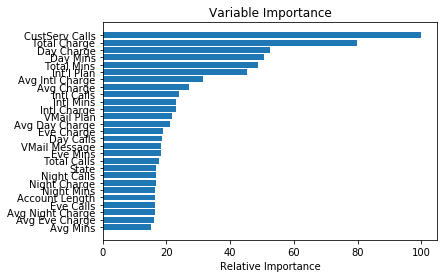

In [292]:
clf = ExtraTreesClassifier(n_estimators=400,random_state=SEED)

clf.fit(X_new,Y_new)


# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.plot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_new.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', '', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Total Mins', 'Avg Mins', 'Total Calls', 'Total Charge', 'Avg Charge',
       'Avg Day Charge', 'Avg Eve Charge', 'Avg Night Charge',
       'Avg Intl Charge'Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Int'l Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'State', 'Area Code',
       'Total Mins', 'Avg Mins', 'Total Calls', 'Total Charge', 'Avg Charge',
       'Avg Day Charge', 'Avg Eve Charge', 'Avg Night Charge',
       'Avg Intl Charge'
        
        
        
CustServ Calls   Total Charge Day Charge  Day Mins  Total Mins  Int'l Plan  Avg Intl Charge   Avg Charge  Intl Calls  Intl Mins 

Intl Charge   VMail Plan   Avg Day Charge  Eve Charge  Day Calls

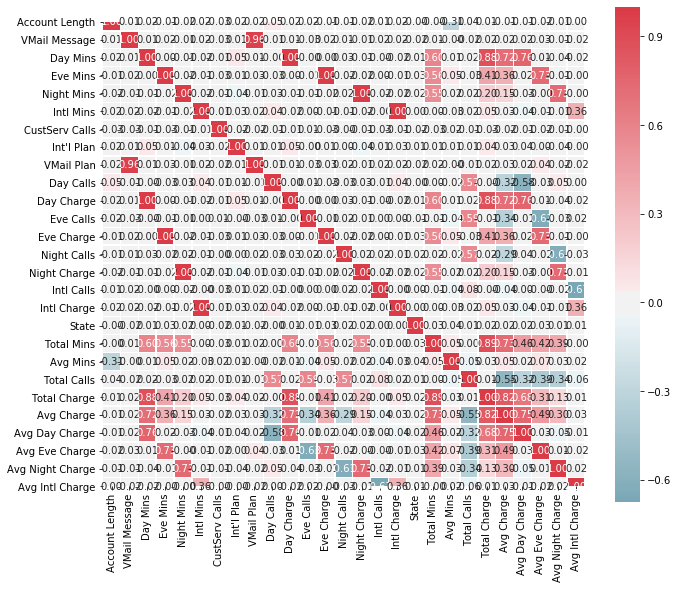

In [294]:
def HeatMap(df_new,x=True):
        correlations = df_new.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df_new,x=True)

## Important features for classification are changed because of creating new columns 

In [251]:
df_new_test = pd.read_excel("test.xlsx")

In [252]:
df_new_test['Total Mins'] = df_new_test['Day Mins'] + df_new_test['Eve Mins'] + df_new_test['Night Mins'] + df_new_test['Intl Mins']

df_new_test['Avg Mins'] = df_new_test['Total Mins'] / df_new_test['Account Length']

df_new_test["Total Calls"] = df_new_test['Day Calls'] + df_new_test['Eve Calls'] + df_new_test['Night Calls'] + df_new_test['Intl Calls']

df_new_test['Total Charge'] = df_new_test['Day Charge'] + df_new_test['Eve Charge'] + df_new_test['Night Charge'] + df_new_test['Intl Charge']

df_new_test['Avg Charge'] = df_new_test['Total Charge'] / df_new_test['Total Calls']

df_new_test['Avg Day Charge'] = df_new_test['Day Charge'] / df_new_test['Day Calls']
df_new_test['Avg Eve Charge'] = df_new_test['Eve Charge'] / df_new_test['Eve Calls']
df_new_test['Avg Night Charge'] = df_new_test['Night Charge'] / df_new_test['Night Calls']
df_new_test['Avg Intl Charge'] = df_new_test['Intl Charge'] / df_new_test['Intl Calls']

In [253]:
df_new_test.isnull().sum()

Account Length      0
VMail Message       0
Day Mins            0
Eve Mins            0
Night Mins          0
Intl Mins           0
CustServ Calls      0
Churn               0
Int'l Plan          0
VMail Plan          0
Day Calls           0
Day Charge          0
Eve Calls           0
Eve Charge          0
Night Calls         0
Night Charge        0
Intl Calls          0
Intl Charge         0
State               0
Area Code           0
Phone               0
Total Mins          0
Avg Mins            0
Total Calls         0
Total Charge        0
Avg Charge          0
Avg Day Charge      0
Avg Eve Charge      0
Avg Night Charge    0
Avg Intl Charge     7
dtype: int64

In [256]:
df_new_test = df_new_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_new_test.drop(['Phone'], axis=1, inplace = True)
df_new_test.drop(['Area Code'], axis=1, inplace = True)

In [257]:
le = LabelEncoder()
le.fit(df_new_test['State'])
df_new_test['State'] = le.transform(df_new_test['State'])

In [261]:
Y_new_test = df_new_test['Churn']

In [262]:
df_new_test.drop(['Churn'], axis=1, inplace = True)

In [263]:
X_new_test = df_new_test

In [264]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300,500]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_new,Y_new,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_new_test)
print('prediction on test set is:' ,floatingDecimals((Y_new_test == Prediction_Ad).mean(),7))

Best: 0.915136 using {'learning_rate': 0.5, 'n_estimators': 200}
prediction on test set is: 0.8918129


In [277]:
# Best Model
learning_rate_value = 0.5
n_estimators_value = 200
model_Ad = AdaBoostClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_Ad.fit(X_new, Y_new)
y_pred = model_Ad.predict(X_new_test)
accscore = accuracy_score(Y_new_test, y_pred)
current_f1_score = f1_score(y_pred, Y_new_test)
conf_mat = confusion_matrix(Y_new_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy :%f" % (accscore))
print(conf_mat)

F1-Score :0.599278
Accuracy :0.891813
[[832  14]
 [ 97  83]]


In [278]:
learning_rate_value = [.01,.05,.1,.5,1,2]
n_estimators_value = [50,100,150,200,250,300,400,500,1000]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_new,Y_new,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_new_test)
print('prediction on test set is:' ,floatingDecimals((Y_new_test == Prediction_GB).mean(),7))

Best: 0.980752 using {'learning_rate': 0.05, 'n_estimators': 100}
prediction on test set is: 0.9678363


In [280]:
learning_rate_value = 0.05
n_estimators_value = 100
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(X_new, Y_new)
y_pred = model_GB.predict(X_new_test)
accscore = accuracy_score(Y_new_test, y_pred)
current_f1_score = f1_score(y_pred, Y_new_test)
conf_mat = confusion_matrix(Y_new_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.899083
Accuracy - Score  :0.967836
[[846   0]
 [ 33 147]]


In [288]:
smt = SMOTE()
X_smt_new,Y_smt_new = smt.fit_sample(X_new,Y_new)

In [289]:
learning_rate_value = [.01,.05,.1,.5,1,2]
n_estimators_value = [50,100,150,200,250,300,400,500,1000]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_smt_new,Y_smt_new,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_new_test)
print('prediction on test set is:' ,floatingDecimals((Y_new_test == Prediction_GB).mean(),7))

Best: 0.984627 using {'learning_rate': 0.1, 'n_estimators': 500}
prediction on test set is: 0.9717349


In [295]:
learning_rate_value = 0.1
n_estimators_value = 500
model_GB = GradientBoostingClassifier(learning_rate=learning_rate_value, n_estimators=n_estimators_value)
model_GB.fit(X_smt_new, Y_smt_new)
y_pred = model_GB.predict(X_new_test)
accscore = accuracy_score(Y_new_test, y_pred)
current_f1_score = f1_score(y_pred, Y_new_test)
conf_mat = confusion_matrix(Y_new_test, y_pred)

print("F1-Score :%f" %(current_f1_score))
print("Accuracy - Score  :%f" % (accscore))
print(conf_mat)

F1-Score :0.907463
Accuracy - Score  :0.969786
[[843   3]
 [ 28 152]]
